# Import Libraries

In [1]:
!pip install scipy==1.11.4
!pip install dalex
!pip install scikit-plot
!pip install shap
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 13.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.7.1-py3-none-any.whl size=1042797 sha256=0a9b22d60047d73f0846bec0a1820451c890794d84dfa06112feac7aec437b38
  Stored in directory: /root/.cache/pip/wheels/fe/c2/41/63e006b3312a4e17299bed5f83d985dea872368f9ab16bb20f
Successfully built dalex
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=dae2540a0a0234604cc288a14a4ffd2bf42f9b07268b219084621b9dede00404
  Stored in dir

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap as shap
import scikitplot as skplt
import dalex as dx
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Load Dataset

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/bank_churn_dataset/bank_churn_data.csv')
df

,user_id,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

In [5]:
df.isnull().sum()

,0
user_id,0
attrition_flag,0
customer_age,0
gender,0
dependent_count,0
education_level,0
marital_status,0
income_category,0
card_category,0
months_on_book,0


In [6]:
df.duplicated().sum()

0

# EDA

## Age Distribution

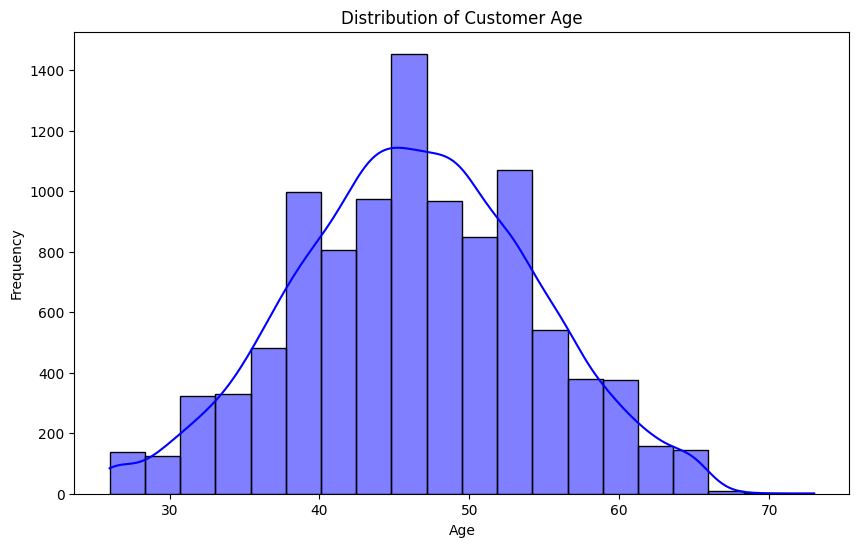

In [7]:
# age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['customer_age'], bins=20, kde=True, color='blue')
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

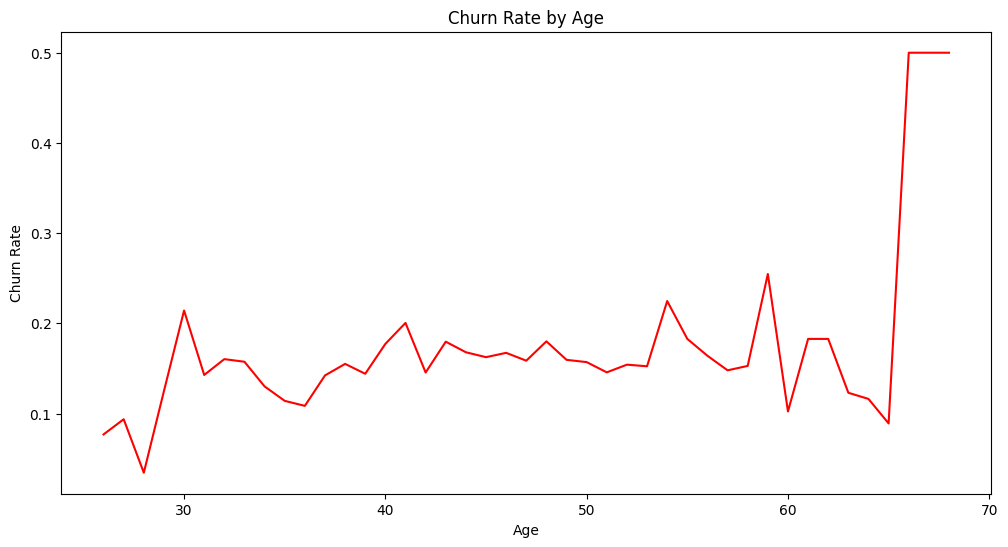

In [8]:
age_churn = df.groupby('customer_age')['attrition_flag'].value_counts(normalize=True).unstack()
age_churn['Churn_Rate'] = age_churn['Attrited Customer']
age_churn.reset_index(inplace=True)
plt.figure(figsize=(12, 6))
sns.lineplot(data=age_churn, x='customer_age', y='Churn_Rate', color='red')
plt.title('Churn Rate by Age')
plt.xlabel('Age')
plt.ylabel('Churn Rate')
plt.show()

In [9]:
# search highest arrited cust
highest_attrited_customer = age_churn.loc[age_churn['Attrited Customer'] == age_churn['Attrited Customer'].max()]
highest_attrited_customer

attrition_flag,customer_age,Attrited Customer,Existing Customer,Churn_Rate
40,66,0.5,0.5,0.5
42,68,0.5,0.5,0.5


the highest customer who most likely to churn are those aged above 60 years old

## Correlation beetween Education Level and Income Category

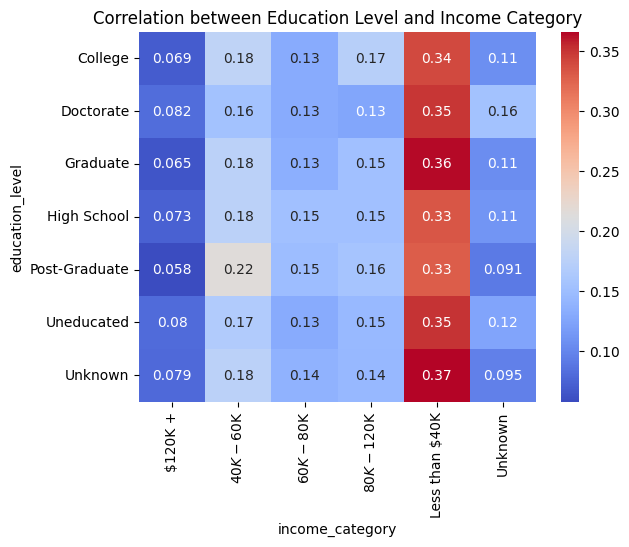

In [10]:
# Correlation beetween Education Level and Income Category
edu_income_churn = pd.crosstab(df['education_level'], df['income_category'], normalize='index')
sns.heatmap(edu_income_churn, annot=True, cmap='coolwarm')
plt.title('Correlation between Education Level and Income Category')
plt.show()

There is a correlation in education level that seems to affect their income category which can cause customers to churn, especially at unknown education levels.

# Churn by Gender

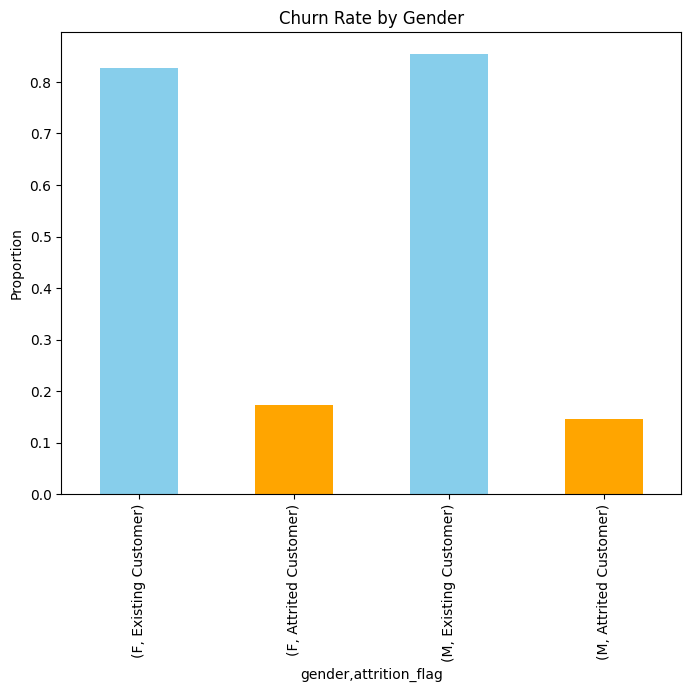

In [11]:
# Churn by gender
gender_churn = df.groupby('gender')['attrition_flag'].value_counts(normalize=True)
gender_churn.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'orange'])
plt.title('Churn Rate by Gender')
plt.ylabel('Proportion')
plt.show()

The distribution of data in the gender section shows that Female slightly churn more than Male.

## Customer Longevity vs Churn

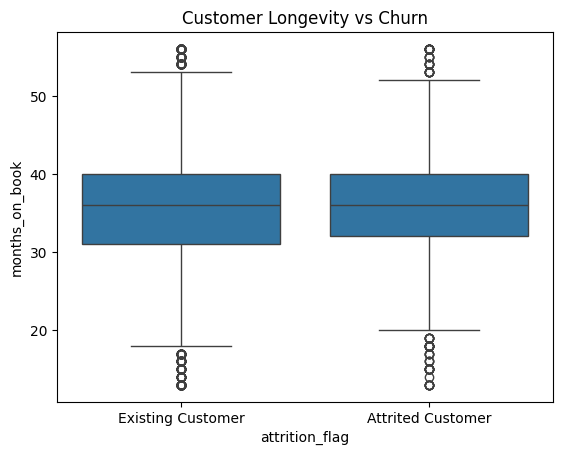

In [12]:
sns.boxplot(x='attrition_flag', y='months_on_book', data=df)
plt.title('Customer Longevity vs Churn')
plt.show()

Most customers have a subscription period of 30 to 40 months, and this is also the period where many customers churn.

## Customer Interactions vs Churn

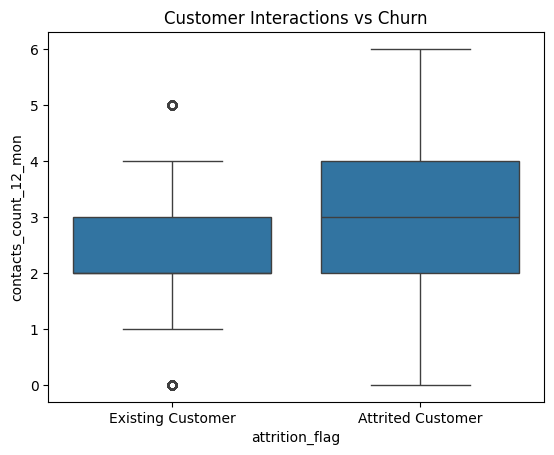

In [13]:
# Customer Interactions vs Churn
sns.boxplot(x='attrition_flag', y='contacts_count_12_mon', data=df)
plt.title('Customer Interactions vs Churn')
plt.show()

Interaction between customers and banks causes many customers to churn

# Data Preprocessing

In [14]:
# identify object columns
cats = df.select_dtypes(include=['object']).columns

# mapping for every columns
mappings = {col: {i: category for i, category in enumerate(df[col].dropna().unique())} for col in cats}

# show mapping result
for col, mapping in mappings.items():
    print(f"colums '{col}': {mapping}")


colums 'attrition_flag': {0: 'Existing Customer', 1: 'Attrited Customer'}
colums 'gender': {0: 'M', 1: 'F'}
colums 'education_level': {0: 'High School', 1: 'Graduate', 2: 'Uneducated', 3: 'Unknown', 4: 'College', 5: 'Post-Graduate', 6: 'Doctorate'}
colums 'marital_status': {0: 'Married', 1: 'Single', 2: 'Unknown', 3: 'Divorced'}
colums 'income_category': {0: '$60K - $80K', 1: 'Less than $40K', 2: '$80K - $120K', 3: '$40K - $60K', 4: '$120K +', 5: 'Unknown'}
colums 'card_category': {0: 'Blue', 1: 'Gold', 2: 'Silver', 3: 'Platinum'}


In [15]:
# lable encoder

# drop user id
df = df.drop(columns=['user_id'])

# identify object columns
cats = df.select_dtypes(include=['object']).columns

# convert to numeric
df[cats] = df[cats].apply(lambda col: col.astype('category').cat.codes)
df.head()

,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [16]:
# Feature selection
X = df.drop(columns=['attrition_flag'])
y = df['attrition_flag']

#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelling

##  Random Forest Classifier

In [17]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# predict and evaluate
rf_y_pred = rf.predict(X_test)

print('classification_report:\n',classification_report(y_test, rf_y_pred))

classification_report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87       496
           1       0.97      0.99      0.98      2543

    accuracy                           0.96      3039
   macro avg       0.95      0.90      0.92      3039
weighted avg       0.96      0.96      0.96      3039



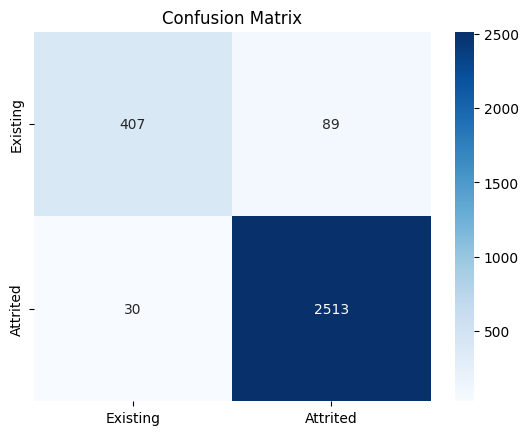

In [19]:
# Confusion Matrix
cm = confusion_matrix(y_test, rf_y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Existing', 'Attrited'], yticklabels=['Existing', 'Attrited'])
plt.title('Confusion Matrix')
plt.show()

In [20]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 0.99


## Multi-Layer Perceptron Classifier

In [21]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_clf.fit(X_train, y_train)

MLPClassifier(max_iter=300, random_state=42)

In [22]:
# predict and evaluate
mlp_y_pred = mlp_clf.predict(X_test)
mlp_roc_auc = roc_auc_score(y_test, mlp_clf.predict_proba(X_test)[:, 1])
print("MLP Classification Report:\n", classification_report(y_test, mlp_y_pred))
print(f"MLP ROC-AUC Score: {mlp_roc_auc:.2f}")

MLP Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.70      0.61       496
           1       0.94      0.89      0.91      2543

    accuracy                           0.86      3039
   macro avg       0.74      0.79      0.76      3039
weighted avg       0.87      0.86      0.86      3039

MLP ROC-AUC Score: 0.88


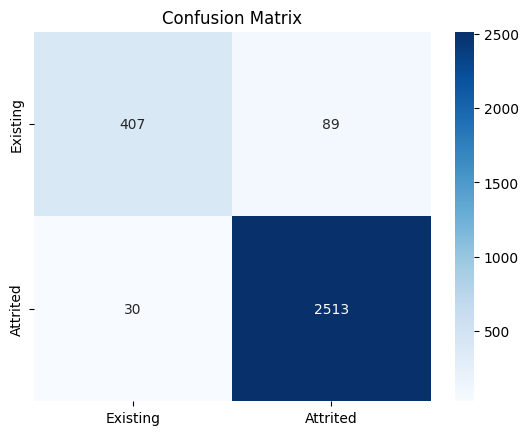

In [23]:
# Confusion Matrix
mlp_cm = confusion_matrix(y_test, mlp_y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Existing', 'Attrited'], yticklabels=['Existing', 'Attrited'])
plt.title('Confusion Matrix')
plt.show()

In [24]:
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:04:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [25]:
# predict and evaluate
xgb_y_pred = xgb_clf.predict(X_test)
xgb_roc_auc = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])

print("XGBoost Classification Report:\n", classification_report(y_test, xgb_y_pred))
print(f"XGBoost ROC-AUC Score: {xgb_roc_auc:.2f}")

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       496
           1       0.98      0.98      0.98      2543

    accuracy                           0.96      3039
   macro avg       0.93      0.93      0.93      3039
weighted avg       0.96      0.96      0.96      3039

XGBoost ROC-AUC Score: 0.99


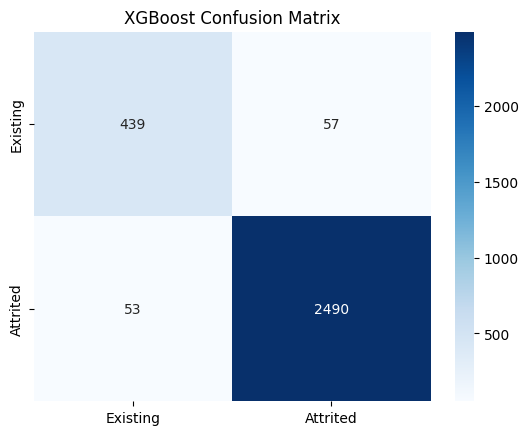

In [26]:
# Confusion Matrix
xgb_cm = confusion_matrix(y_test, xgb_y_pred)
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Existing', 'Attrited'], yticklabels=['Existing', 'Attrited'])
plt.title('XGBoost Confusion Matrix')
plt.show()


ROC-AUC

In [27]:
print("Comparison of Models:")
print(f"Random Forest ROC-AUC: {roc_auc:.2f}")
print(f"MLP ROC-AUC: {mlp_roc_auc:.2f}")
print(f"XGBoost ROC-AUC: {xgb_roc_auc:.2f}")

Comparison of Models:
Random Forest ROC-AUC: 0.99
MLP ROC-AUC: 0.88
XGBoost ROC-AUC: 0.99


In [28]:
rf_y_prob = rf.predict_proba(X_test)
mlp_y_prob = mlp_clf.predict_proba(X_test)
xgb_y_prob = xgb_clf.predict_proba(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

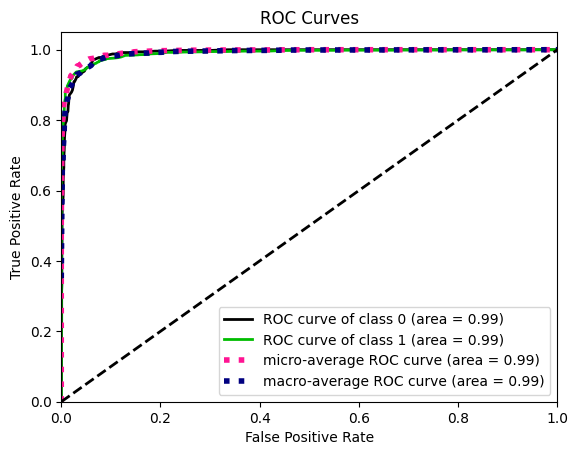

In [29]:
# random forest result
skplt.metrics.plot_roc_curve(y_test, rf_y_prob)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

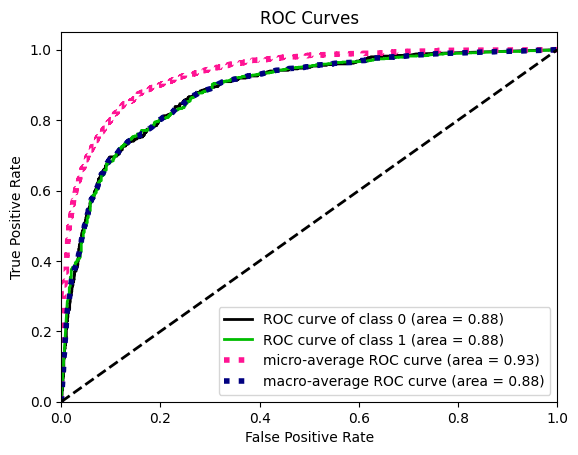

In [30]:
# mlp result
skplt.metrics.plot_roc_curve(y_test, mlp_y_prob)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

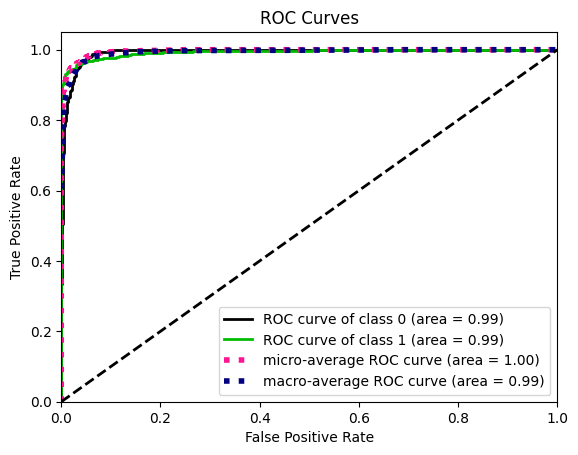

In [31]:
# random forest result
skplt.metrics.plot_roc_curve(y_test, xgb_y_prob)

XGBoost Classifier is the best model for this dataset.

In [35]:
# initiate explainer for XGBoost model
churn_xgb_exp = dx.Explainer(xgb_clf, X_train, y_train, label = "XGBoost Interpretation")

Preparation of a new explainer is initiated

  -> data              : 7088 rows 19 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 7088 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : XGBoost Interpretation
  -> predict function  : <function yhat_proba_default at 0x7c71a22a7d00> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 1.46e-06, mean = 0.84, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.192, mean = 2.03e-05, max = 0.198
  -> model_info        : package xgboost

A new explainer has been created!


In [36]:
# visualize permutation feature importance for XGBoost model
churn_xgb_exp.model_parts().plot()

most importance feature :
- total_trans_ct : the number of transactions in the last 12 months
- total_trans_amt : total nominal transaction in the last 12 months
- total_amt_chng_q4_q1 : the number of customer transactions increased between quarter.
- total_relationship_count : the number of products used by customers in the bank
- total_revolving_bal : total funds used in one period.

The model is more influenced by behavioral variables (such as transactions and customer relationships) than demographic variables (such as gender, education level, or income category).
Features with low contribution can be considered for removal in the model simplification process without sacrificing significant performance.